# DeepSeek形态学识别

- @作者：AFAN
- @时间：2025-03-23
- @B站：[AFAN的金融科技](https://space.bilibili.com/1020711810)
- @公众号：[AFAN Fintech（点击通过文章关注）](https://mp.weixin.qq.com/s/f1Om7j9jndkqhlyfyqrgOw)
- @微信：afan-life
- @github：https://github.com/AFAN-LIFE/AFAN-LIFE
- @知识星球（付费分享）：[AFAN的金融科技](https://wx.zsxq.com/group/88885818554422)
- *注：本分享来自于AFAN的公开分享，转载请注明出处

In [73]:
import matplotlib
import numpy as np
import pandas as pd
import tushare as ts
import mplfinance as mpf
import matplotlib.pyplot as plt

In [74]:
np.__version__, pd.__version__, ts.__version__, mpf.__version__, matplotlib.__version__

('1.24.3', '2.0.3', '1.4.19', '0.12.10b0', '3.7.2')

In [6]:
pro = ts.pro_api('你的token')

## 获取分钟数据

In [ ]:
#获取浦发银行60000.SH的历史分钟数据
df = pro.stk_mins(ts_code='600000.SH', freq='1min', start_date='2025-03-21 09:00:00', end_date='2025-03-21 16:00:00')

In [56]:
df.to_csv('测试数据.csv')

In [57]:
df

,ts_code,trade_time,close,open,high,low,vol,amount
0,600000.SH,2025-03-21 15:00:00,10.47,10.47,10.47,10.47,3356800.0,35145696.0
1,600000.SH,2025-03-21 14:59:00,10.44,10.44,10.44,10.44,0.0,0.0
2,600000.SH,2025-03-21 14:58:00,10.44,10.44,10.44,10.44,9800.0,102382.0
3,600000.SH,2025-03-21 14:57:00,10.45,10.45,10.45,10.44,487500.0,5091717.0
4,600000.SH,2025-03-21 14:56:00,10.44,10.44,10.45,10.44,193100.0,2017274.0
...,...,...,...,...,...,...,...,...
236,600000.SH,2025-03-21 09:34:00,10.64,10.65,10.65,10.62,133700.0,1422218.0
237,600000.SH,2025-03-21 09:33:00,10.64,10.64,10.66,10.63,146000.0,1554048.0
238,600000.SH,2025-03-21 09:32:00,10.63,10.66,10.66,10.63,294000.0,3131448.0
239,600000.SH,2025-03-21 09:31:00,10.65,10.64,10.68,10.62,496100.0,5282928.0


## 蜡烛图展示

In [49]:
adj_df = df.set_index('trade_time')
adj_df.index = pd.DatetimeIndex(adj_df.index)
adj_df = adj_df.rename(columns={'vol': 'volume'})

In [50]:
adj_df

,ts_code,close,open,high,low,volume,amount
trade_time,,,,,,,
2025-03-21 15:00:00,600000.SH,10.47,10.47,10.47,10.47,3356800.0,35145696.0
2025-03-21 14:59:00,600000.SH,10.44,10.44,10.44,10.44,0.0,0.0
2025-03-21 14:58:00,600000.SH,10.44,10.44,10.44,10.44,9800.0,102382.0
2025-03-21 14:57:00,600000.SH,10.45,10.45,10.45,10.44,487500.0,5091717.0
2025-03-21 14:56:00,600000.SH,10.44,10.44,10.45,10.44,193100.0,2017274.0
...,...,...,...,...,...,...,...
2025-03-21 09:34:00,600000.SH,10.64,10.65,10.65,10.62,133700.0,1422218.0
2025-03-21 09:33:00,600000.SH,10.64,10.64,10.66,10.63,146000.0,1554048.0
2025-03-21 09:32:00,600000.SH,10.63,10.66,10.66,10.63,294000.0,3131448.0


In [51]:
# 设置mplfinance的蜡烛颜色，up为阳线颜色，down为阴线颜色
my_color = mpf.make_marketcolors(up='r',
                                 down='g',
                                 edge='inherit',
                                 wick='inherit',
                                 volume='inherit')
# 设置图表的背景色
my_style = mpf.make_mpf_style(marketcolors=my_color,
                              figcolor='(0.82, 0.83, 0.85)',
                              gridcolor='(0.82, 0.83, 0.85)')

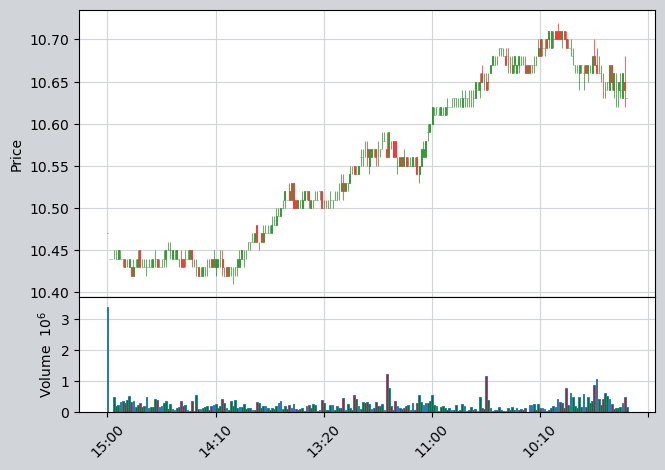

In [55]:
mpf.plot(adj_df, style=my_style, type='candle', volume=True, returnfig=True)
plt.savefig('test.png')  # 保存为PNG文件

## DeepSeek预测

In [62]:
SK_CODE = '你的硅基流动token'

In [63]:
import base64

# 将本地图片转换为 Base64 编码
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [64]:
# 将图片转换为 Base64
image_base64 = image_to_base64('test.png')

In [69]:
import requests

url = "https://api.siliconflow.cn/v1/chat/completions"

payload = {
    "model": "deepseek-ai/deepseek-vl2",
    "stream": False,
    "max_tokens": 512,
    "temperature": 0.7,
    "top_p": 0.7,
    "top_k": 50,
    "frequency_penalty": 0.5,
    "n": 1,
    "stop": [],
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "image_url": {
                        "detail": "auto",
                        "url": f"data:image/png;base64,{image_base64}"  # 使用 Base64 编码的图片数
                    },
                    "type": "image_url"
                },
                {
                    "text": """你是一个研究股票投资形态学理论的专家，请你根据这个股票
                    日内成交量和价格的情况来分析这只股票明天上涨的概率，并一定要给出一个-1到1之间的值，
                    -1表示大概率会下跌，1表示大概率上涨，0表示涨跌不确定""",
                    "type": "text"
                }
            ]
        }
  ],
}
headers = {
    "Authorization": f"Bearer {SK_CODE}",
    "Content-Type": "application/json"
}

In [70]:
# 忽略 SSL 验证
response = requests.post(url, json=payload, headers=headers, verify=False)
response.text

D:\software\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


'{"id":"0195c2bdf1cd8cc9b5b2c45ff243b791","object":"chat.completion","created":1742728983,"model":"deepseek-ai/deepseek-vl2","choices":[{"index":0,"message":{"role":"assistant","content":"很抱歉，我无法提供实时的股票市场分析。不过，我可以根据你提供的图表信息给出一些基于形态学的分析思路。\\n\\n1. **价格趋势**：从图中可以看到，这只股票的价格在当天有显著上涨的趋势，尤其是在接近收盘时，价格明显高于开盘价。这种上涨趋势可能表明市场对该股票有较高的兴趣。\\n\\n2. **成交量**：成交量的变化也值得注意。虽然整体成交量相对较低，但在价格上涨的过程中，成交量有所增加。这通常是一个积极的信号，表明有更多的买家参与其中。\\n\\n3. **K线形态**：从K线的形态来看，当天有多个阳线（绿色），且阳线的实体部分较长，显示出买家的力量较强。\\n\\n4. **其他技术指标**：如果结合其他技术指标（如移动平均线、MACD等），可以进一步确认价格趋势的可靠性。\\n\\n综上所述，基于这些观察，这只股票明天的上涨概率可能较高。因此，我给出一个接近1的值来表示大概率上涨的可能性。"},"finish_reason":"stop"}],"usage":{"prompt_tokens":1479,"completion_tokens":206,"total_tokens":1685},"system_fingerprint":""}'